# Sect 27: K-Nearest Neighbors

online-ds-pt-100719

03/31/20

## QUESTIONS/COMMENTS?

- GridSearchCV? What is it? How would you use it?
- .predict/.predict_proba / .decision_function?c
    - "y_score" vs accuracy score?

> "Objective function" a function that we are looking minimizing or maximize to improve our model performance.

### Learning Objectives:


- Understand the different distance metrics
- Understand how K-Nearest Neighbors works 
- Do the KNN with Scikit Learn Lab together (if time)

# Distance Metrics

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-pt-100719/master/images/knn_fs.png" width=50%>

### Manhattan

<img src ="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/manhattan_fs.png" width=60%>


$$ \large d(x,y) = \sum_{i=1}^{n}|x_i - y_i | $$  
> "The right side of the equals sign looks like it has a bit more going on, but don't let the mathematical notation scare you. In basic English, it essentially means "calculate the absolute number of units you move in each distinct dimension, and then sum them all up"."

>"The  ∑  just means "the cumulative sum of each step". In a given step, you take a dimension, and then look at the corresponding values for that dimension on point X and point Y. You then compute the absolute value of the difference between them by subtracting Y's value for that dimension from X's value for that dimension, and then add it to our total."

### Euclidian

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/euclidean_fs.png" width=20%>

 The equation at the heart of this one is probably familiar to you: $a^2 + b^2 = c^2$, or the **_Pythagorean theorem_**
 
 $$ \large d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$  


### Minkowski

- A generalized distance metric across a _Normed Vector Space_.
- "A Normed Vector Space"= a collection of space where each point has been processed by a function (any function, as long it meets two criteria:) 
    1. the zero vector (just a vector filled with zeros) will output a length of 0, and 
    2. every other vector must have a positive length 

$$\large d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^c\right)^\frac{1}{c}$$  


Both the Manhattan and Euclidean distances are actually _special cases of Minkowski distance_. Take a look: 



Do you see it? It's the exponent! In this case, the function is just an exponent. If you were to define a value for the exponent, you could say that:


# K Nearest Neighbors

- Supervised Learning
- Classification OR regression.
- The K-nearest neighbors (K=hyperparameter) vote to say which class the particular data point should belong to.


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/knn_fs.png" width=40%>


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-k-nearest-neighbors-online-ds-pt-100719/master/images/knn.gif" width=60%>

# Activity: KNN with Scikit Learn - Lab


- [Learn Lesson](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-27-k-nearest-neighbors/knn-with-scikit-learn-lab)

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.17 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [14]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. In the cells below, complete the following steps:
1. Remove unnecessary columns (`'PassengerId'`, `'Name'`, `'Ticket'`, and `'Cabin'`) 
2. Convert `'Sex'` to a binary encoding, where female is `0` and male is `1` 
3. Detect and deal with any missing values in the dataset:  
    * For `'Age'`, replace missing values with the median age for the dataset  
    * For `'Embarked'`, drop the rows that contain missing values
4. One-hot encode categorical columns such as `'Embarked'` 
5. Store the target column, `'Survived'`, in a separate variable and remove it from the DataFrame  

In [15]:
# Drop the unnecessary columns
# df = df.drop(['PassengerId', 'Name', 'Ticket','Cabin'],axis=1)
df = df.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
# df = pd.get_dummies(df,columns=['Sex'], drop_first=True)
# df.head()

In [17]:
# Convert Sex to binary encoding (0='female')
df['Sex'] = df['Sex'].map({'female':0, 'male':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [18]:
# Find the number of missing values in each column
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
# Impute the missing values in 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [21]:
# Drop the rows missing values in the 'Embarked' column
df = df.dropna(subset=['Embarked'])
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df.dtypes

Survived      int64
Pclass       object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [25]:
# One-hot encode the categorical columns
one_hot_df = pd.get_dummies(df,columns=['Pclass','Embarked'])
one_hot_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Pclass_?,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [26]:
# Assign the 'Survived' column to labels
labels = one_hot_df.pop('Survived')
one_hot_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Pclass_?,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,1
1,0,38.0,1,0,71.2833,1,0,0,0,1,0,0
2,0,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,0,35.0,1,0,53.1000,1,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [27]:
# # Assign the 'Survived' column to labels
# labels = one_hot_df['Survived'].copy()

# # Drop the 'Survived' column from one_hot_df
# one_hot_df.drop(columns=['Survived'],inplace=True)

> ## Create training and test sets
* Use `train_test_split()` to split the data into training and test sets, with a `test_size` of `0.25`. Set the `random_state` to 42 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_df, labels, 
                                                    test_size=0.25, random_state=42)
X_train.shape, y_test.shape

((666, 12), (223,))

> ## Normalizing the data 
* Import and instantiate `StandardScaler` 
* Use the scaler's `.fit_transform()` method to create a scaled version of the training dataset  
* Use the scaler's `.transform()` method to create a scaled version of the test dataset  
* The result returned by `.fit_transform()` and `.transform()` methods will be numpy arrays, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns` 
* Print the head of `scaled_df` to ensure everything worked correctly 

In [34]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train,columns=X_train.columns)
scaled_df_train.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Pclass_?,Embarked_C,Embarked_Q,Embarked_S
0,-1.390655,-0.575676,-0.474917,-0.480663,-0.500108,-0.532200,-0.483046,0.941640,-0.25278,-0.483046,-0.311768,0.620174
1,-1.390655,1.550175,-0.474917,-0.480663,-0.435393,-0.532200,2.070197,-1.061977,-0.25278,-0.483046,-0.311768,0.620174
2,0.719086,-0.120137,-0.474917,-0.480663,-0.644473,-0.532200,2.070197,-1.061977,-0.25278,-0.483046,-0.311768,0.620174
3,0.719086,-0.120137,-0.474917,-0.480663,-0.115799,1.878992,-0.483046,-1.061977,-0.25278,-0.483046,-0.311768,0.620174
4,-1.390655,-1.107139,0.413551,-0.480663,-0.356656,-0.532200,-0.483046,0.941640,-0.25278,2.070197,-0.311768,-1.612452


> ## Fit a KNN model
Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy. 
In the cells below:
* Import `KNeighborsClassifier` from the `sklearn.neighbors` module 
* Instantiate the classifier. For now, you can just use the default parameters  
* Fit the classifier to the training data/labels
* Use the classifier to generate predictions on the test data. Store these predictions inside the variable `test_preds` 

In [36]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_df_train,y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

> ## Evaluate the model
- Here we will deviate and we will use the assignment/challenge function `evaluate_classification` from sect 25-Pt2 s.g.

### Activity: Make an `evaluate_classification` function

- Write a function called evaluate_classification
- It should accept: 
    - y_true,
    - y_pred

- It should produce:
    - Classification metrics printed
    - Confusion Matrix displayed
    - roc_auc curve displayed
    
    
- ~~Then revisit some of the questions we had from last class re: scaling, LogisticRegression parameters~~

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """From https://github.com/learn-co-students/dsc-visualizing-confusion-matrices-lab-online-ds-pt-100719/tree/solution"""
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 


In [51]:
y_score = clf.predict_proba(scaled_data_test)[:,1]
y_score

array([0. , 1. , 0.6, 0.2, 1. , 0. , 0. , 0. , 1. , 1. , 0.2, 0.4, 0. ,
       0.2, 0.2, 0. , 0.6, 0.2, 0. , 0. , 0.2, 1. , 0. , 0.6, 0. , 0.4,
       0.6, 0.8, 0.2, 0. , 0.6, 1. , 0. , 0.6, 0. , 0.4, 1. , 0.6, 0. ,
       0. , 0.2, 0.4, 0. , 0. , 0.8, 0.4, 1. , 0.2, 0.2, 1. , 1. , 0.8,
       0. , 0.2, 1. , 1. , 0.8, 0.2, 0.2, 0.2, 0.2, 0.8, 1. , 0.2, 1. ,
       0.2, 0. , 1. , 1. , 1. , 0.2, 1. , 0.8, 0.2, 0.4, 0.8, 0.2, 0. ,
       0.8, 0.6, 0.2, 1. , 1. , 1. , 0.2, 0.2, 0.2, 0. , 0.2, 0. , 0.2,
       0.6, 0. , 0.2, 0.4, 0.6, 0. , 0.2, 0.6, 0.2, 0.2, 1. , 0. , 0.4,
       0. , 0.2, 0.2, 1. , 0.2, 0. , 0. , 0.4, 0. , 1. , 0.2, 0.4, 0. ,
       0. , 0.2, 0.2, 1. , 1. , 0. , 0. , 1. , 1. , 0.6, 0.8, 0.8, 0. ,
       1. , 0.2, 0.2, 0. , 0.2, 0.6, 0.2, 1. , 0.4, 1. , 0.8, 0. , 1. ,
       0. , 1. , 0.4, 0. , 1. , 0.2, 1. , 0.2, 0.8, 0.2, 0.8, 0.8, 1. ,
       0. , 0.6, 0.2, 0.4, 0. , 1. , 0.4, 0.2, 0.2, 0.8, 1. , 0. , 0. ,
       1. , 1. , 1. , 0.8, 0. , 0.8, 0.6, 0.2, 0.8, 1. , 0.6, 0.

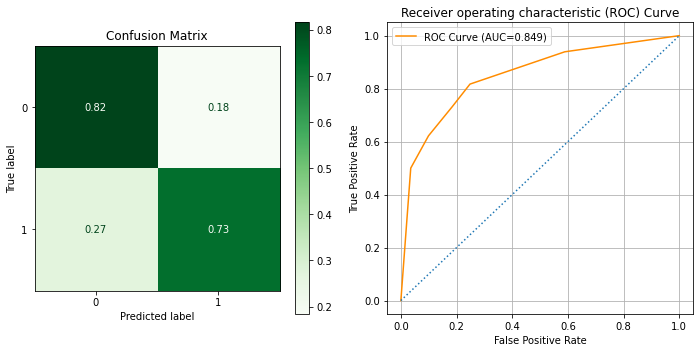

In [59]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2)
metrics.plot_confusion_matrix(clf,scaled_data_test,y_test,cmap="Greens",
                              normalize='true',ax=ax[0])
ax[0].set(title='Confusion Matrix')
y_score = clf.predict_proba(scaled_data_test)[:,1]

fpr,tpr,thresh = metrics.roc_curve(y_test,y_score)
# print(f"ROC-area-under-the-curve= {}")
roc_auc = round(metrics.auc(fpr,tpr),3)
ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
ax[1].plot([0,1],[0,1],ls=':')
ax[1].legend()
ax[1].grid()
ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
      title='Receiver operating characteristic (ROC) Curve')
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       141
           1       0.70      0.73      0.71        82

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.79      0.78      0.79       223



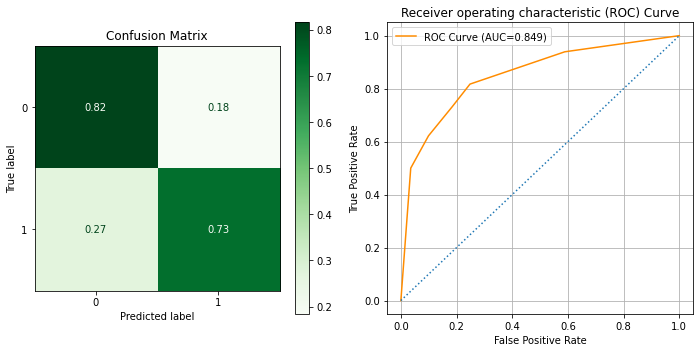

In [82]:
import sklearn.metrics as metrics


def evaluate_classification(y_true, y_pred,X_true, clf): 
    import sklearn.metrics as metrics
     
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))
 
    fig, ax = plt.subplots(figsize=(10,5),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Greens",
                                  normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # print(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()

evaluate_classification(y_test,test_preds,scaled_data_test,clf)

> Interpret each of the metrics above, and explain what they tell you about your model's capabilities. If you had to pick one score to best describe the performance of the model, which would you choose? Explain your answer.
- Discuss as a group


>## Improve model performance
While your overall model results should be better than random chance, they're probably mediocre at best given that you haven't tuned the model yet. For the remainder of this notebook, you'll focus on improving your model's performance. Remember that modeling is an **_iterative process_**, and developing a baseline out of the box model such as the one above is always a good start. <br>
First, try to find the optimal number of neighbors to use for the classifier. To do this, complete the `find_best_k()` function below to iterate over multiple values of K and find the value of K that returns the best overall performance. <br><br>
**The function takes in six arguments:**
* `X_train`
* `y_train`
* `X_test`
* `y_test`
* `min_k` (default is 1)
* `max_k` (default is 25)
    
> **Pseudocode Hint**:
1. Create two variables, `best_k` and `best_score`
1. Iterate through every **_odd number_** between `min_k` and `max_k + 1`. 
    1. For each iteration:
        1. Create a new `KNN` classifier, and set the `n_neighbors` parameter to the current value for k, as determined by the loop 
        1. Fit this classifier to the training data 
        1. Generate predictions for `X_test` using the fitted classifier 
        1. Calculate the **_F1-score_** for these predictions 
        1. Compare this F1-score to `best_score`. If better, update `best_score` and `best_k` 
1. Once all iterations are complete, print the best value for k and the F1-score it achieved 

In [83]:
# from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
param_grid = dict( n_neighbors = list(range(1,26,2)))#,
#                  p = [1,2])
grid = GridSearchCV(clf,param_grid,scoring='f1',verbose=1,return_train_score=True)

grid.fit(scaled_data_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1)

In [84]:
grid.best_params_

{'n_neighbors': 5}

In [85]:
clf = grid.best_estimator_
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       141
           1       0.70      0.73      0.71        82

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.79      0.78      0.79       223



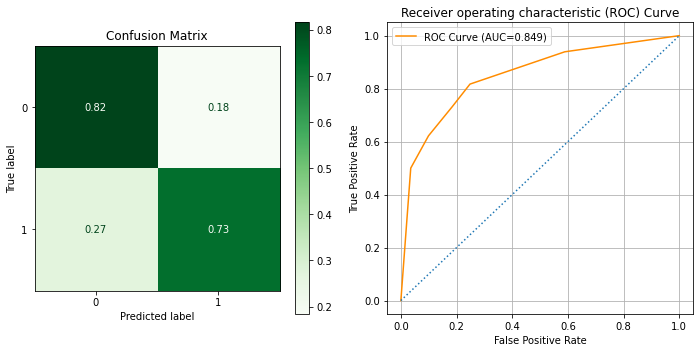

In [86]:
y_hat_test = clf.predict(scaled_data_test)
evaluate_classification(y_test,y_hat_test,scaled_data_test,clf)

In [74]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)


Best Value for k: 11
F1-Score: 0.7261146496815286


In [89]:
# ## import py file
# from importlib import reload
# import sect_27 as s27
# reload(s27)
# s27.evaluate_classification(y_test,y_hat_test,scaled_data_test,clf)

> ## ~~(Optional) Level Up:~~ Iterating on the data
As an ~~optional (but recommended!)~~ exercise:
- think about the decisions you made during the preprocessing steps that could have affected the overall model performance. 
    - For instance, you were asked to replace the missing age values with the column median. Could this have affected the overall performance? 
    - How might the model have fared if you had just dropped those rows, instead of using the column median? 
    - What if you reduced the data's dimensionality by ignoring some less important columns altogether?
- In the cells below, revisit your preprocessing stage and see if you can improve the overall results of the classifier by doing things differently. 
    - Consider dropping certain columns, dealing with missing values differently, or using an alternative scaling function. 
    - Then see how these different preprocessing techniques affect the performance of the model. 
    - Remember that the `find_best_k()` function handles all of the fitting; use this to iterate quickly as you try different strategies for dealing with data preprocessing! 